In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [7]:
matches_orig = pd.read_csv('datasets/matches.csv')
delivs_orig = pd.read_csv('datasets/deliveries.csv')
matches, delivs = matches_orig.copy(), delivs_orig.copy()

matches.to_pickle('pickles/matches.pkl')
delivs.to_pickle('pickles/delivs.pkl')

In [15]:
delivs.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [54]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


<h3>Highest scoring batsmen over all seasons.</h3>

In [23]:
batsman_runs_sorted = delivs.groupby('batsman')[['batsman', 'batsman_runs']].sum().sort_values(by='batsman_runs', ascending=False).reset_index()
batsman_runs_sorted.head(10)

,batsman,batsman_runs
0,SK Raina,4548
1,V Kohli,4423
2,RG Sharma,4207
3,G Gambhir,4132
4,DA Warner,4014
5,RV Uthappa,3778
6,CH Gayle,3651
7,S Dhawan,3561
8,MS Dhoni,3560
9,AB de Villiers,3486


In [34]:
delivs['if_dismissed'] = delivs['player_dismissed'].fillna(0)
for item in delivs['if_dismissed']:
    if not item == 0:
        delivs['if_dismissed'].replace(item, 1, inplace=True)
delivs['if_dismissed'].head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: if_dismissed, dtype: int64

In [35]:
delivs['if_dismissed'].value_counts()

0    143022
1      7438
Name: if_dismissed, dtype: int64

<h3>Top wicket takers over all seasons</h3>

In [55]:
wicket_takers_sorted = delivs.groupby('bowler')[['bowler', 'if_dismissed']].sum().sort_values(by='if_dismissed', ascending=False).reset_index()
wicket_takers_sorted.columns = ['bowler', 'wickets']
wicket_takers_sorted.head(10)

,bowler,wickets
0,SL Malinga,170
1,A Mishra,142
2,DJ Bravo,137
3,Harbhajan Singh,136
4,PP Chawla,133
5,R Vinay Kumar,125
6,A Nehra,121
7,Z Khan,119
8,B Kumar,117
9,R Ashwin,110


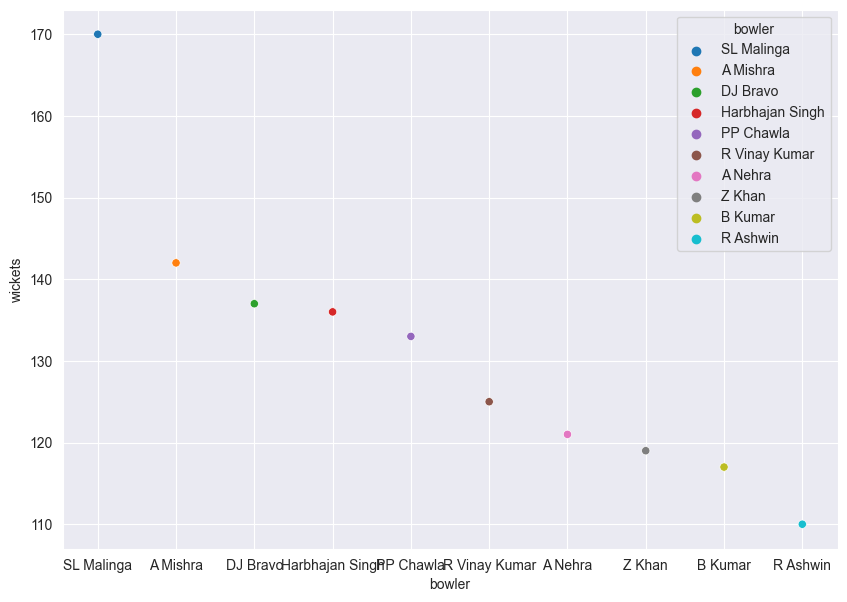

In [56]:
fig, ax = plt.subplots(1,1, figsize = (10,7))
sns.scatterplot(data=wicket_takers_sorted.head(10), x='bowler', y='wickets', hue='bowler')
plt.show()